<script type="text/x-mathjax-config">
MathJax.Hub.Config({tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}});
MathJax.Ajax.config.path["mhchem"] =
  "https://cdnjs.cloudflare.com/ajax/libs/mathjax-mhchem/3.3.2";
MathJax.Hub.Config({
  TeX: {
    extensions: ["[mhchem]/mhchem.js"]
  }
});
</script>
<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-MML-AM_CHTML' async></script>
$$\require{mhchem}$$

# pytzer demonstration

Here we contrive some basic examples to show how Jupyter Notebooks could demonstrate **pytzer**'s capabilities. Full documentation for pytzer is under construction at [pytzer.readthedocs.io](https://pytzer.readthedocs.io/en/latest/).

## Introductory notes

These notebooks can contain formatted text, including equations and chemical reactions:

$$\ce{H2O <=>[K_\text{w}] OH- + H+}$$

$$K_\text{w} = \{\ce{H+}\}\{\ce{OH-}\} = \gamma(\ce{H+}) [\ce{H+}] \cdot \gamma(\ce{OH-}) [\ce{OH-}]$$

## Showcasing the software

### Import dataset

The notebooks may also include interactive code and figures. We could begin by importing some molality and temperature data from a CSV file:

In [1]:
import pytzer as pz

# Import a dataset from a CSV file, and list its contents
mols, ions, tempK = pz.io.getmols('data/NaKCl.csv')
print('The ions are: {}'.format(ions))
print('Molalities:')
print(mols)
print('Temperatures:')
print(tempK)

The ions are: ['Na' 'K' 'Cl']
Molalities:
[[0.  0.2 0.4 0.6 0.8 1. ]
 [1.  0.8 0.6 0.4 0.2 0. ]
 [1.  1.  1.  1.  1.  1. ]]
Temperatures:
[298.15 298.15 298.15 298.15 298.15 298.15]


This example dataset therefore contains a series of mixtures of NaCl and KCl solutions with pure endmembers, all at a constant ionic strength of 1 mol/kg, and all at 298.15 K.

### Calculate solution properties

We can now use pytzer to calculate some properties of the imported solution compositions. To do this, we must first select a set of Pitzer model coefficients to use for the calculations (i.e. a "coefficient library"). For example, to calculate the osmotic coefficients:

In [2]:
# Select the MarChemSpec coefficient library
cflib = pz.cflibs.MarChemSpec

# Calculate the osmotic coefficients
osm = pz.model.osm(mols, ions, tempK, cflib)
print('Osmotic coefficients: {}'.format(osm))

Osmotic coefficients: [0.89885509 0.90413923 0.91052737 0.9180195  0.92661564 0.93631578]


### Visualise the results

We can also visualise the results here in the notebook:

<IPython.core.display.Javascript object>


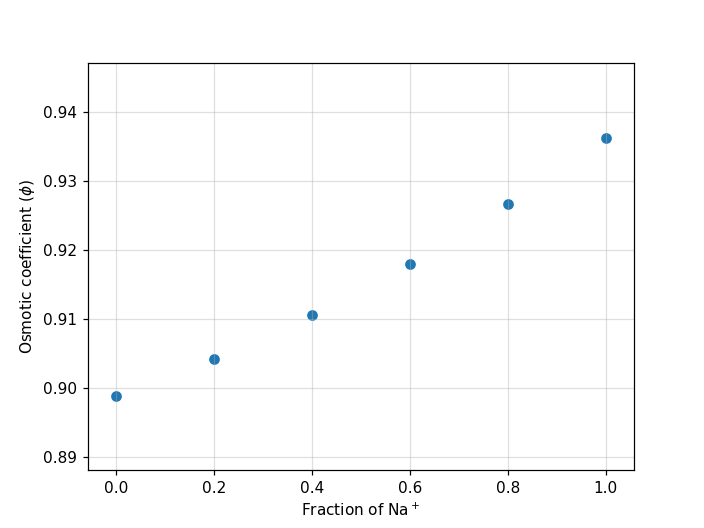

In [4]:
# Set up plotting tools
from matplotlib import pyplot as plt
%matplotlib notebook

# Calculate fraction of [Na+]
fNa = mols[ions=='Na'] / (mols[ions=='Na'] + mols[ions=='K'])

# Illustrate results
fig, ax = plt.subplots(1, 1)
ax.scatter(fNa, osm)
ax.set_xlabel('Fraction of Na$^+$')
ax.set_ylabel('Osmotic coefficient ($\phi$)')
ax.grid(alpha=0.4)

We can see that increasing the fraction of $\ce{Na+}$ in a mixture with $\ce{K+}$ from 0 to 1 leads the osmotic coefficient ($\phi$) to increase from just under 0.90 to over 0.93.